In [5]:
# Let's first parse the log file content into a Python dictionary. 
# The dictionary will be structured with datasets as keys and a sub-dictionary as values, 
# where the sub-dictionary will have checkpoints as keys and scores as values.

log_file_content = """
8w_ste_sft_ckpt250-hellaswag: 0.765982871938
8w_ste_sft_ckpt250-swag: 0.769369189243
8w_ste_sft_ckpt250-boolq: 0.751376146789
8w_ste_sft_ckpt250-xwinograd_en: 0.882580645161
8w_ste_sft_ckpt250-winogrande: 0.692975532755
8w_ste_sft_ckpt500-hellaswag: 0.768771161123
8w_ste_sft_ckpt500-swag: 0.76966909927
"""

#path = './logs/summary_4w_fixed.txt'
path = '/home/data/compression/quik_cache/summary_4w_quik.txt'

with open(path, 'r') as f:
    log_file_content = ''.join(f.readlines())



In [6]:

# Parse the log content
data = {}
for line in log_file_content.strip().split("\n"):
    parts = line.split(":")
    key, score = parts[0], float(parts[1].strip())
    ckpt, dataset = key.rsplit("-", 1)
    if dataset not in data:
        data[dataset] = {}
    data[dataset][ckpt] = score

# Now we will plot the progress over checkpoints for each dataset
import matplotlib.pyplot as plt


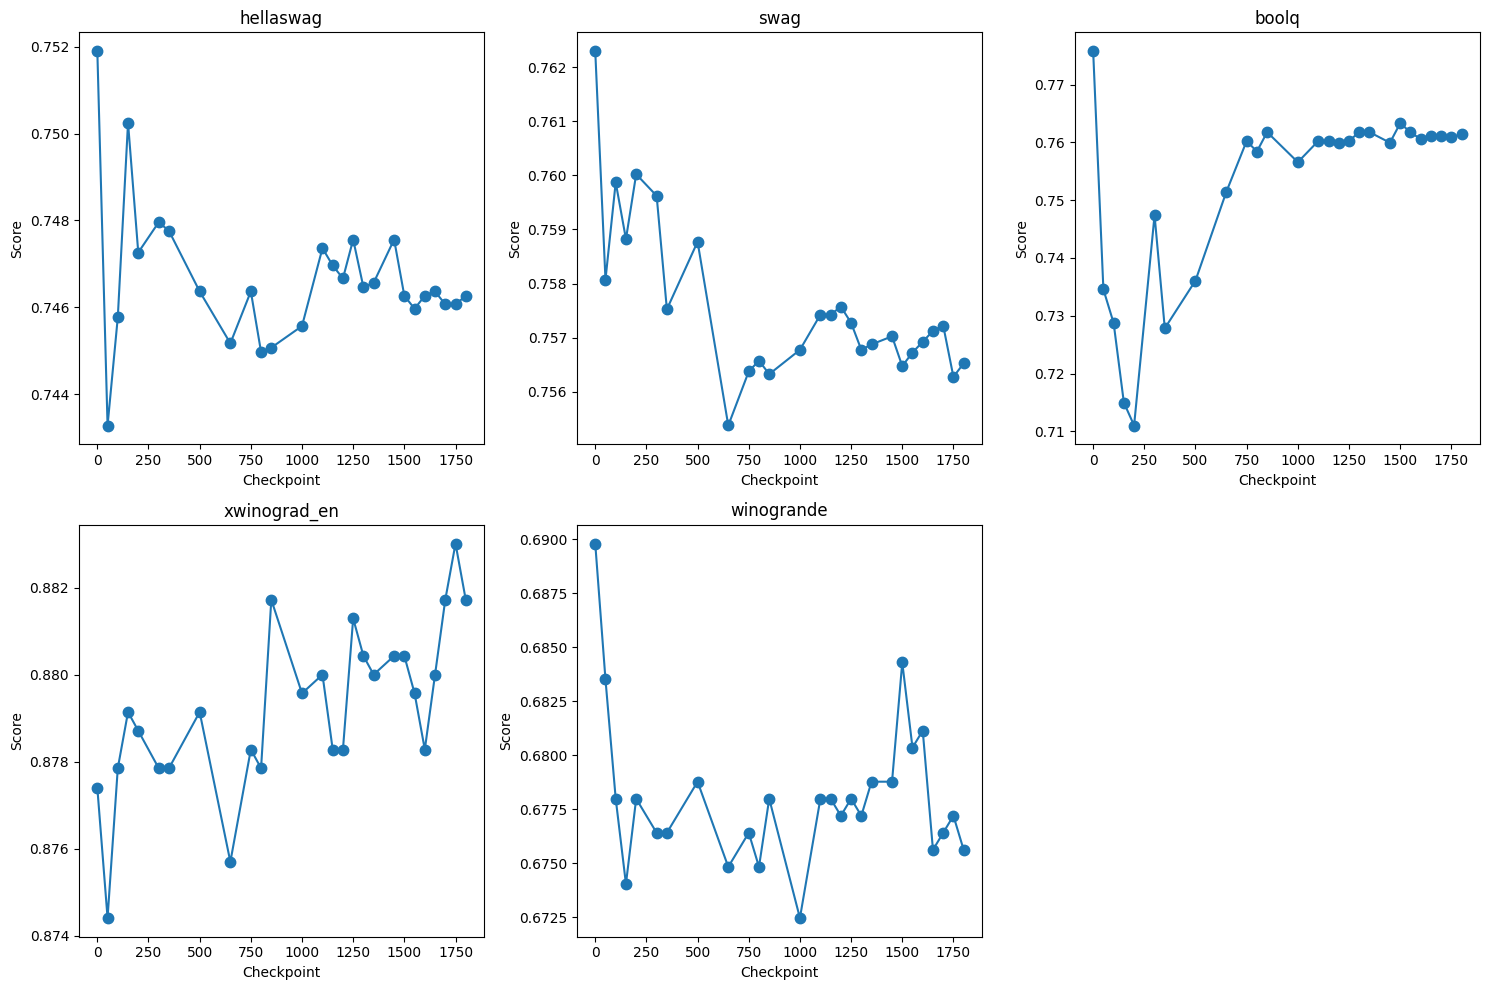

In [7]:
baseline_scores = {
    "winogrande": 0.6898,
    "boolq": 0.7758,
    "hellaswag": 0.7519,
    "swag": 0.7623,
    "xwinograd_en": 0.8774
}


# Calculate the number of rows and columns for subplots
n_datasets = len(data)
n_rows = int(n_datasets ** 0.5)  # Square root to layout plots in a square-like form
n_cols = (n_datasets // n_rows) + (n_datasets % n_rows > 0)  # Ensure all plots fit

# Create a subplot for each dataset
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
if n_rows == 1 and n_cols == 1:  # If there's only one plot
    axes = [axes]  # Make it iterable
elif n_rows == 1 or n_cols == 1:  # If there's only one row or one column
    axes = axes.flatten()  # Flatten the array to simplify indexing
else:
    axes = [ax for row in axes for ax in row]  # Flatten the 2D array of axes

# Iterate over datasets and their respective axes
for i, (dataset, ckpts) in enumerate(data.items()):
    ax = axes[i]
    # Sort checkpoints by their numerical value for proper plotting
    sorted_ckpts = sorted(ckpts.items(), key=lambda x: int(x[0].split("ckpt")[-1]))
    checkpoints = [int(ckpt[0].split("ckpt")[-1]) for ckpt in sorted_ckpts]
    scores = [ckpt[1] for ckpt in sorted_ckpts]

    # Insert baseline score at checkpoint 0
    checkpoints.insert(0, 0)
    scores.insert(0, baseline_scores[dataset])

    # Plot on the specified subplot
    ax.plot(checkpoints, scores, marker='.', markersize=15)
    ax.set_xlabel("Checkpoint")
    ax.set_ylabel("Score")
    ax.set_title(f"{dataset}")

# Hide unused axes if there are any
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('figs/4w_ste_sft_quik.png')
plt.show()

In [8]:

path_f = './logs/summary_4w_fixed.txt'
path = '/home/data/compression/quik_cache/summary_4w_quik.txt'

with open(path, 'r') as f:
    log_file_content = ''.join(f.readlines())

with open(path_f, 'r') as f:
    log_file_content_f = ''.join(f.readlines())


# Parse the log content
data = {}
for line in log_file_content.strip().split("\n"):
    parts = line.split(":")
    key, score = parts[0], float(parts[1].strip())
    ckpt, dataset = key.rsplit("-", 1)
    if dataset not in data:
        data[dataset] = {}
    data[dataset][ckpt] = score

# Parse the log content
data_f = {}
for line in log_file_content_f.strip().split("\n"):
    parts = line.split(":")
    key, score = parts[0], float(parts[1].strip())
    ckpt, dataset = key.rsplit("-", 1)
    if dataset not in data_f:
        data_f[dataset] = {}
    data_f[dataset][ckpt] = score


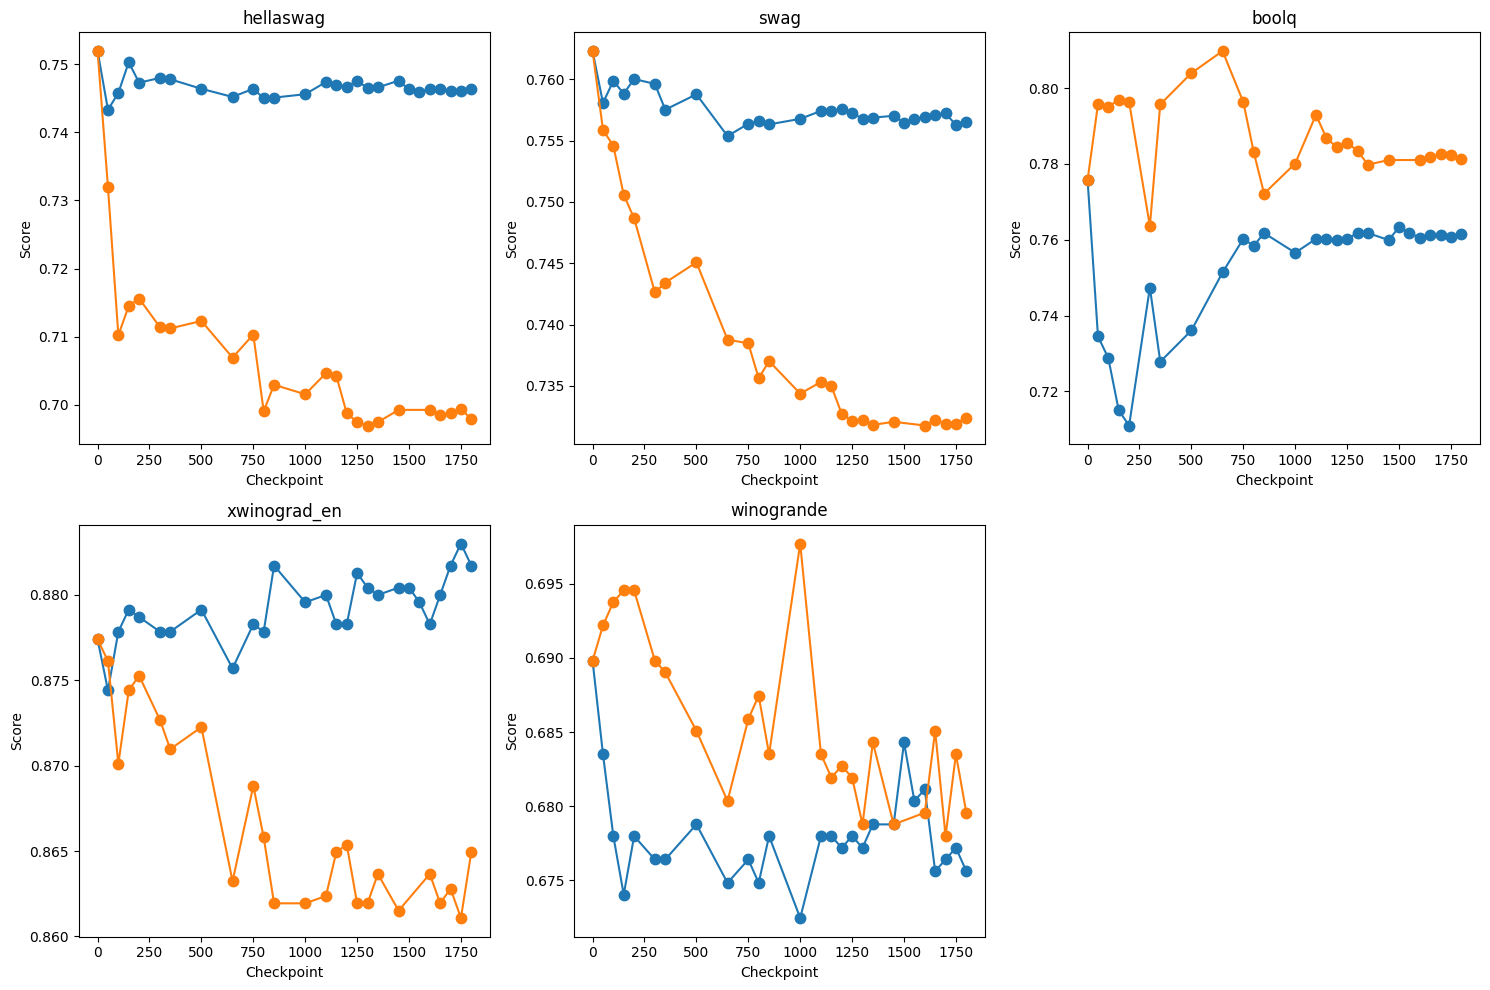

In [20]:
baseline_scores = {
    "winogrande": 0.6898,
    "boolq": 0.7758,
    "hellaswag": 0.7519,
    "swag": 0.7623,
    "xwinograd_en": 0.8774
}


# Calculate the number of rows and columns for subplots
n_datasets = len(data)
n_rows = int(n_datasets ** 0.5)  # Square root to layout plots in a square-like form
n_cols = (n_datasets // n_rows) + (n_datasets % n_rows > 0)  # Ensure all plots fit

# Create a subplot for each dataset
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
if n_rows == 1 and n_cols == 1:  # If there's only one plot
    axes = [axes]  # Make it iterable
elif n_rows == 1 or n_cols == 1:  # If there's only one row or one column
    axes = axes.flatten()  # Flatten the array to simplify indexing
else:
    axes = [ax for row in axes for ax in row]  # Flatten the 2D array of axes

# Iterate over datasets and their respective axes
for i, (dataset, ckpts) in enumerate(data.items()):
    ax = axes[i]
    # Sort checkpoints by their numerical value for proper plotting
    sorted_ckpts = sorted(ckpts.items(), key=lambda x: int(x[0].split("ckpt")[-1]))
    checkpoints = [int(ckpt[0].split("ckpt")[-1]) for ckpt in sorted_ckpts]
    scores = [ckpt[1] for ckpt in sorted_ckpts]

    # Insert baseline score at checkpoint 0
    checkpoints.insert(0, 0)
    scores.insert(0, baseline_scores[dataset])

    f_ckpts = data_f[dataset]
    sorted_f_ckpts = sorted(f_ckpts.items(), key=lambda x: int(x[0].split("ckpt")[-1]))
    checkpoints_f = [int(ckpt[0].split("ckpt")[-1]) for ckpt in sorted_f_ckpts]
    scores_f = [ckpt[1] for ckpt in sorted_f_ckpts]

    checkpoints_f.insert(0, 0)
    scores_f.insert(0, baseline_scores[dataset])

    # Plot on the specified subplot
    ax.plot(checkpoints, scores, marker='.', markersize=15, label='not fixed')
    ax.plot(checkpoints_f, scores_f, marker='.', markersize=15, label='fixed')
    ax.set_xlabel("Checkpoint")
    ax.set_ylabel("Score")
    ax.set_title(f"{dataset}")
   # ax.legend()


# Hide unused axes if there are any
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('figs/compare.png')
plt.show()

In [22]:
data_f['boolq']

{'4w_ste_sft_quik_fix_ckpt1650': 0.781957186544,
 '4w_ste_sft_quik_fix_ckpt1150': 0.786850152905,
 '4w_ste_sft_quik_fix_ckpt1250': 0.785626911315,
 '4w_ste_sft_quik_fix_ckpt1700': 0.782568807339,
 '4w_ste_sft_quik_fix_ckpt200': 0.796330275229,
 '4w_ste_sft_quik_fix_ckpt500': 0.803975535168,
 '4w_ste_sft_quik_fix_ckpt850': 0.772171253823,
 '4w_ste_sft_quik_fix_ckpt150': 0.796941896024,
 '4w_ste_sft_quik_fix_ckpt1200': 0.784403669725,
 '4w_ste_sft_quik_fix_ckpt1750': 0.782262996942,
 '4w_ste_sft_quik_fix_ckpt1100': 0.792966360856,
 '4w_ste_sft_quik_fix_ckpt1800': 0.781345565749,
 '4w_ste_sft_quik_fix_ckpt1350': 0.779816513761,
 '4w_ste_sft_quik_fix_ckpt50': 0.795718654434,
 '4w_ste_sft_quik_fix_ckpt800': 0.783180428135,
 '4w_ste_sft_quik_fix_ckpt1600': 0.781039755352,
 '4w_ste_sft_quik_fix_ckpt1300': 0.783486238532,
 '4w_ste_sft_quik_fix_ckpt1450': 0.781039755352,
 '4w_ste_sft_quik_fix_ckpt1000': 0.780122324159,
 '4w_ste_sft_quik_fix_ckpt350': 0.795718654434,
 '4w_ste_sft_quik_fix_ckpt75